In [36]:
#Author: D M V S V Karthik Jayanthi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [37]:
df=pd.read_csv("C:/Users/karth/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [39]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [40]:
df=df.dropna()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [42]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [49]:
def grab_col_names(dataframe, cat_th=10):
    # Categorical columns
    cat_cols = [col for col in dataframe.columns if (dataframe[col].dtype == "O")and(col!='customerID')]
    
    # Numerical but categorical columns
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtype != "O"]
    
    # Update categorical columns list to include numerical but categorical columns
    cat_cols += num_but_cat
    
    # Remove numerical but categorical columns from the list of numerical columns
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O" and col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"Total columns categorized: {len(cat_cols) + len(num_but_cat) + len(num_cols)}")
    
    return cat_cols, num_but_cat, num_cols
cat_cols, num_but_cat, num_cols = grab_col_names(df)

Observations: 7032
Variables: 21
cat_cols: 17
num_but_cat: 1
num_cols: 3
Total columns categorized: 21


In [50]:
print('categorical:',cat_cols)
print('Numerical:',num_cols)

categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']
Numerical: ['tenure', 'MonthlyCharges', 'TotalCharges']


#### outlier detection

In [51]:
#to find the outlier thresholdes
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
    
#To check outliers
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
        
for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


# EDA

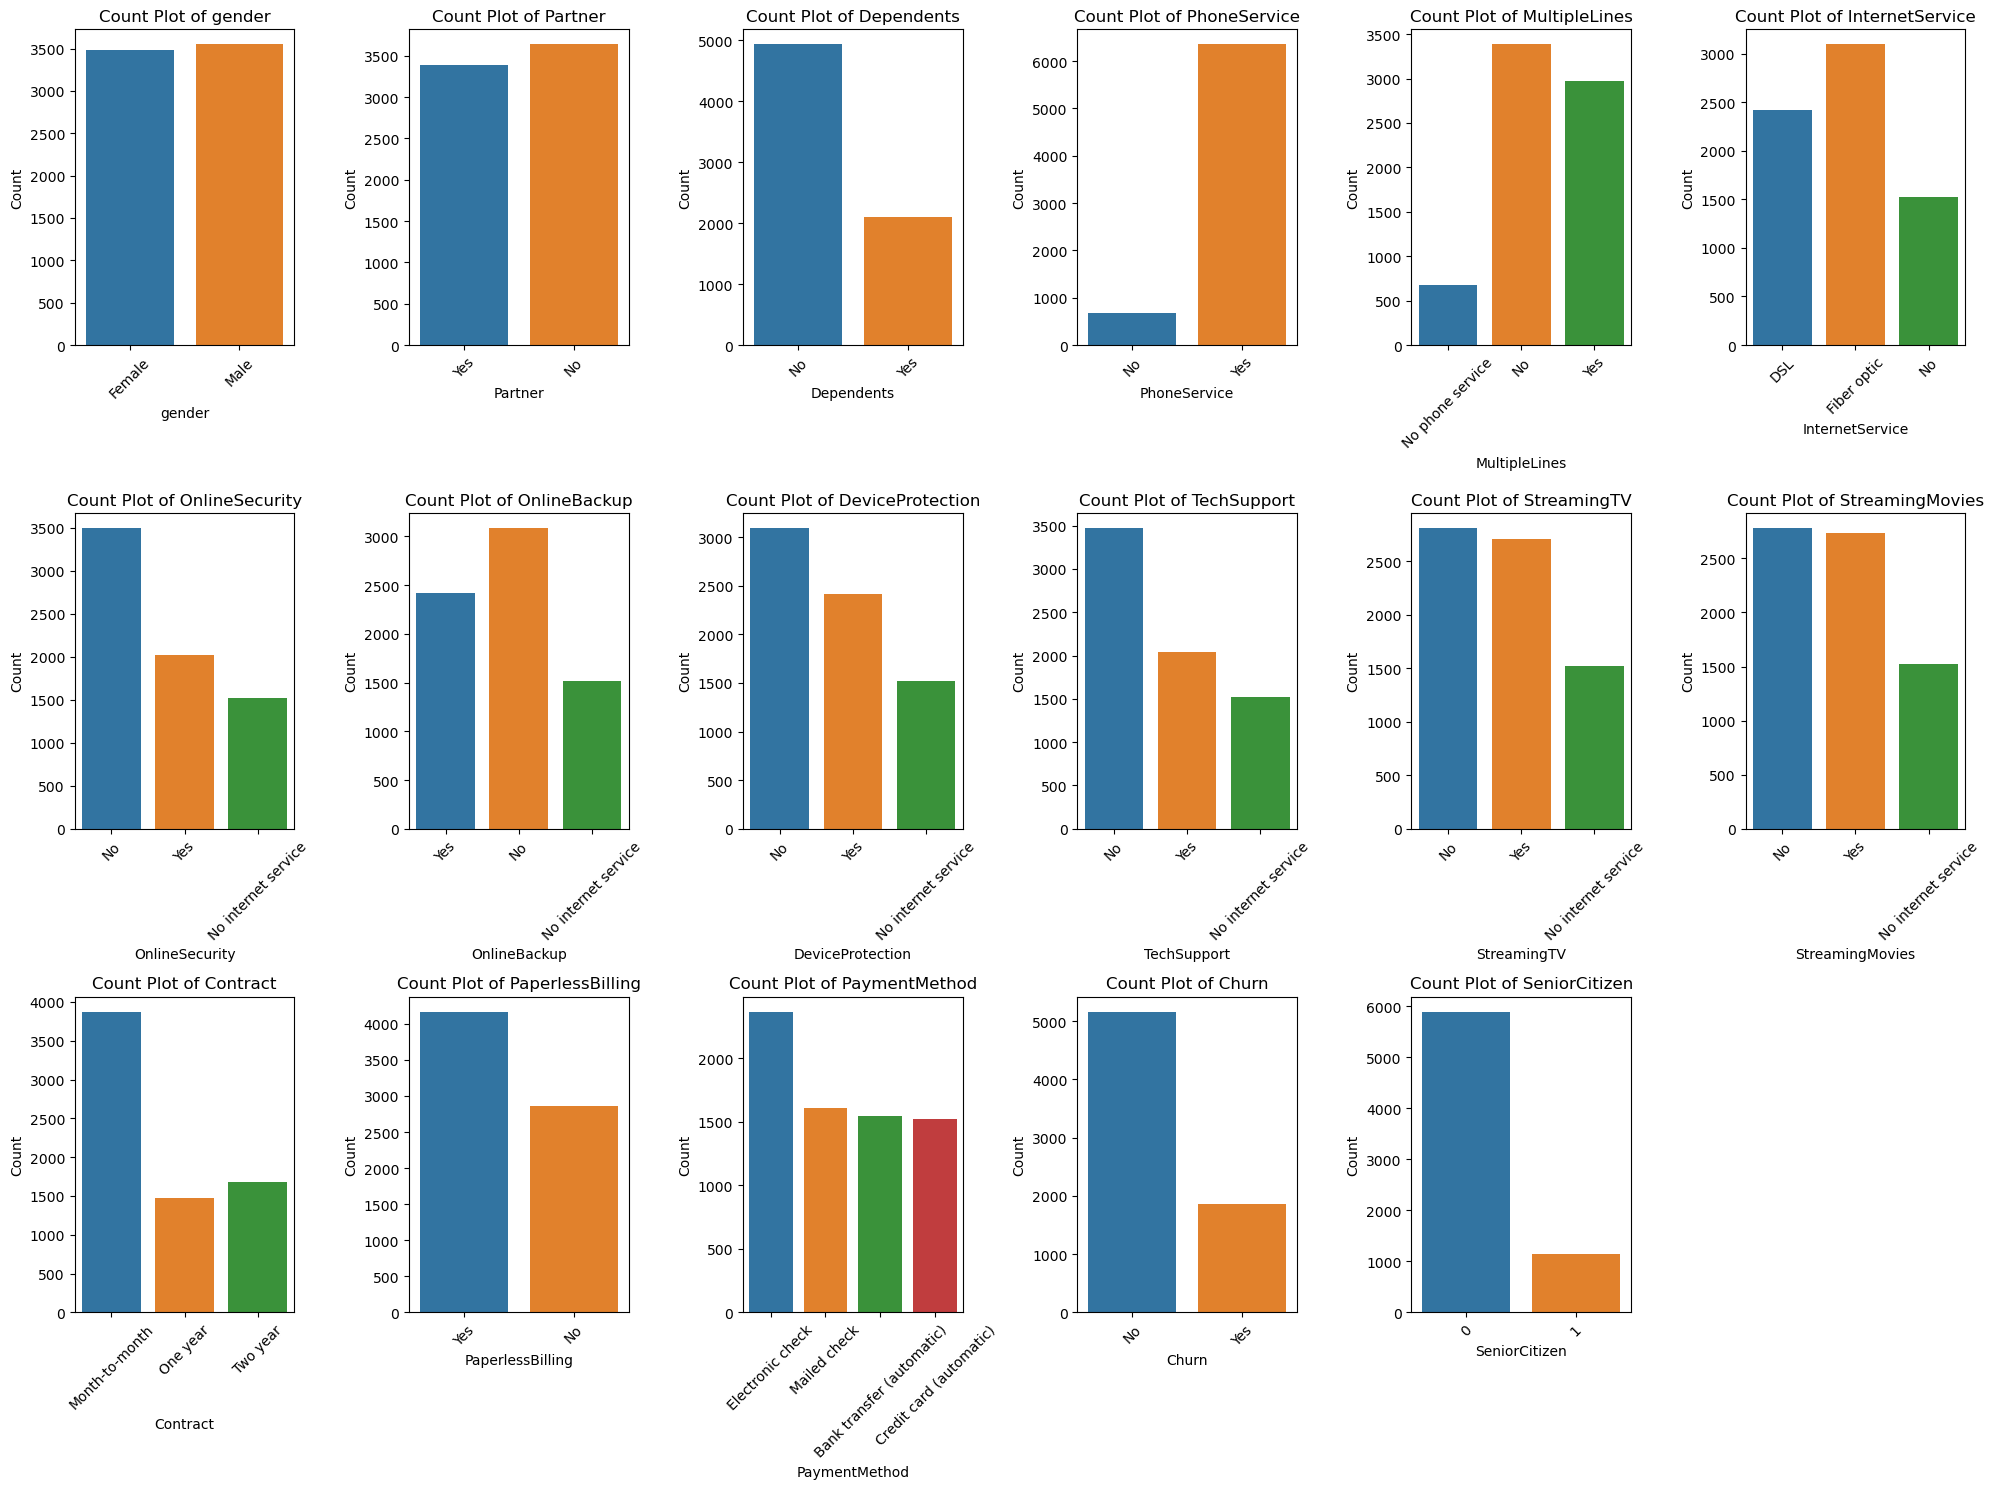

In [53]:
# Determine the number of rows and columns for subplots
n_cols = 6
n_rows = -(-len(cat_cols) // n_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create count plots for each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\karth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Tenure vs Churn Value')

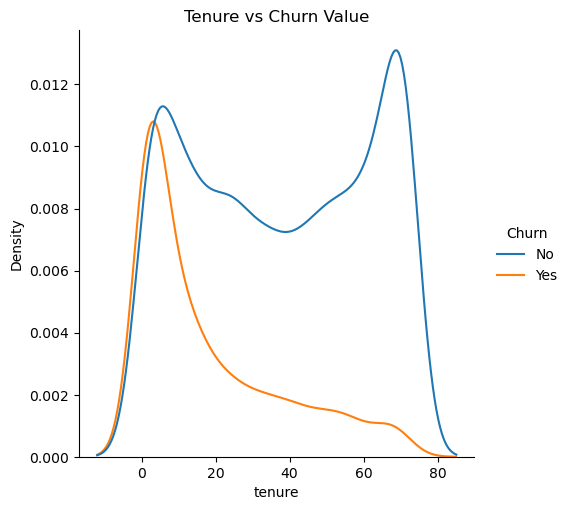

In [13]:
sns.displot(data = df, x = "tenure", hue = "Churn", kind = "kde")
plt.title('Tenure vs Churn Value')

C:\Users\karth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\karth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


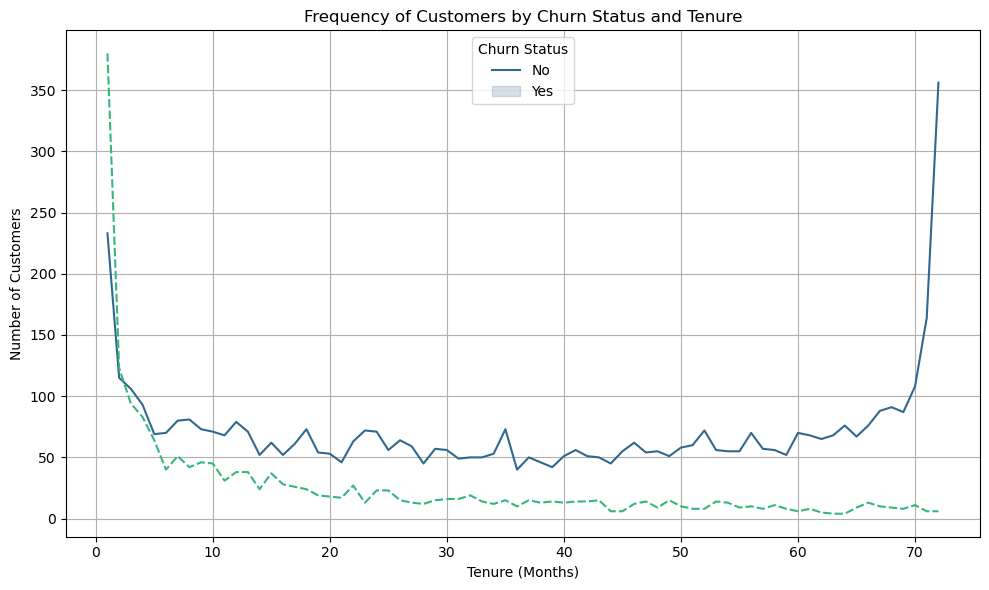

In [14]:
# Create a count of churn status by tenure
churn_counts = df.groupby(['tenure', 'Churn']).size().reset_index(name='Count')

# Pivot the data to have separate columns for 'Yes' and 'No' churn counts
churn_pivot = churn_counts.pivot(index='tenure', columns='Churn', values='Count').fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_pivot, palette='viridis')

# Customize plot
plt.title('Frequency of Customers by Churn Status and Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status', labels=['No', 'Yes'])
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# Handeling the biase in Target Variable

<Axes: xlabel='Churn', ylabel='count'>

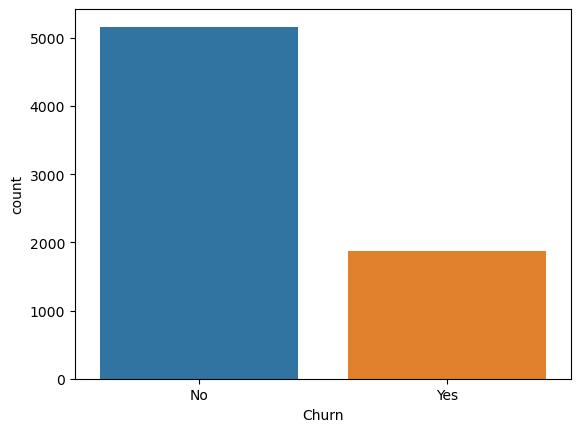

In [12]:
sns.countplot(x='Churn', data=df)

In [68]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Churn','customerID']) 
y = df['Churn']

# Encode categorical features
X_encoded = pd.get_dummies(X)

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply SMOTE to handle imbalance
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)

In [69]:
X_resampled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.850000,29.850000,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.950000,1889.500000,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.850000,108.150000,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.300000,1840.750000,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.700000,151.650000,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,0,3,77.499593,254.494598,True,True,False,True,True,False,...,False,True,False,False,False,True,True,False,True,False
10322,0,4,89.711627,398.954912,True,True,True,True,True,False,...,True,True,False,False,False,True,False,False,True,False
10323,0,21,83.791179,1843.706929,True,True,False,True,True,True,...,True,True,False,False,True,True,False,False,True,True
10324,0,31,78.435023,2435.115819,True,True,True,True,True,False,...,False,True,False,False,False,True,False,False,True,False


<Axes: ylabel='count'>

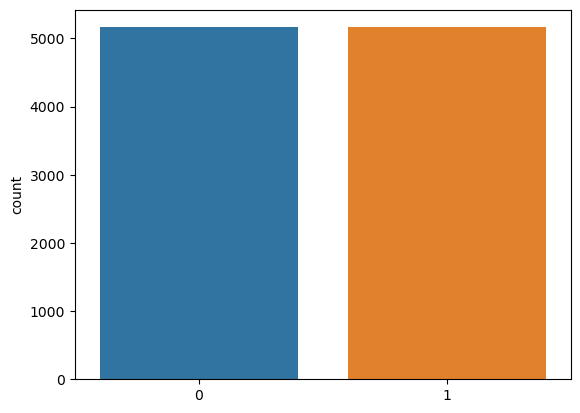

In [70]:
sns.countplot(x=y_resampled)

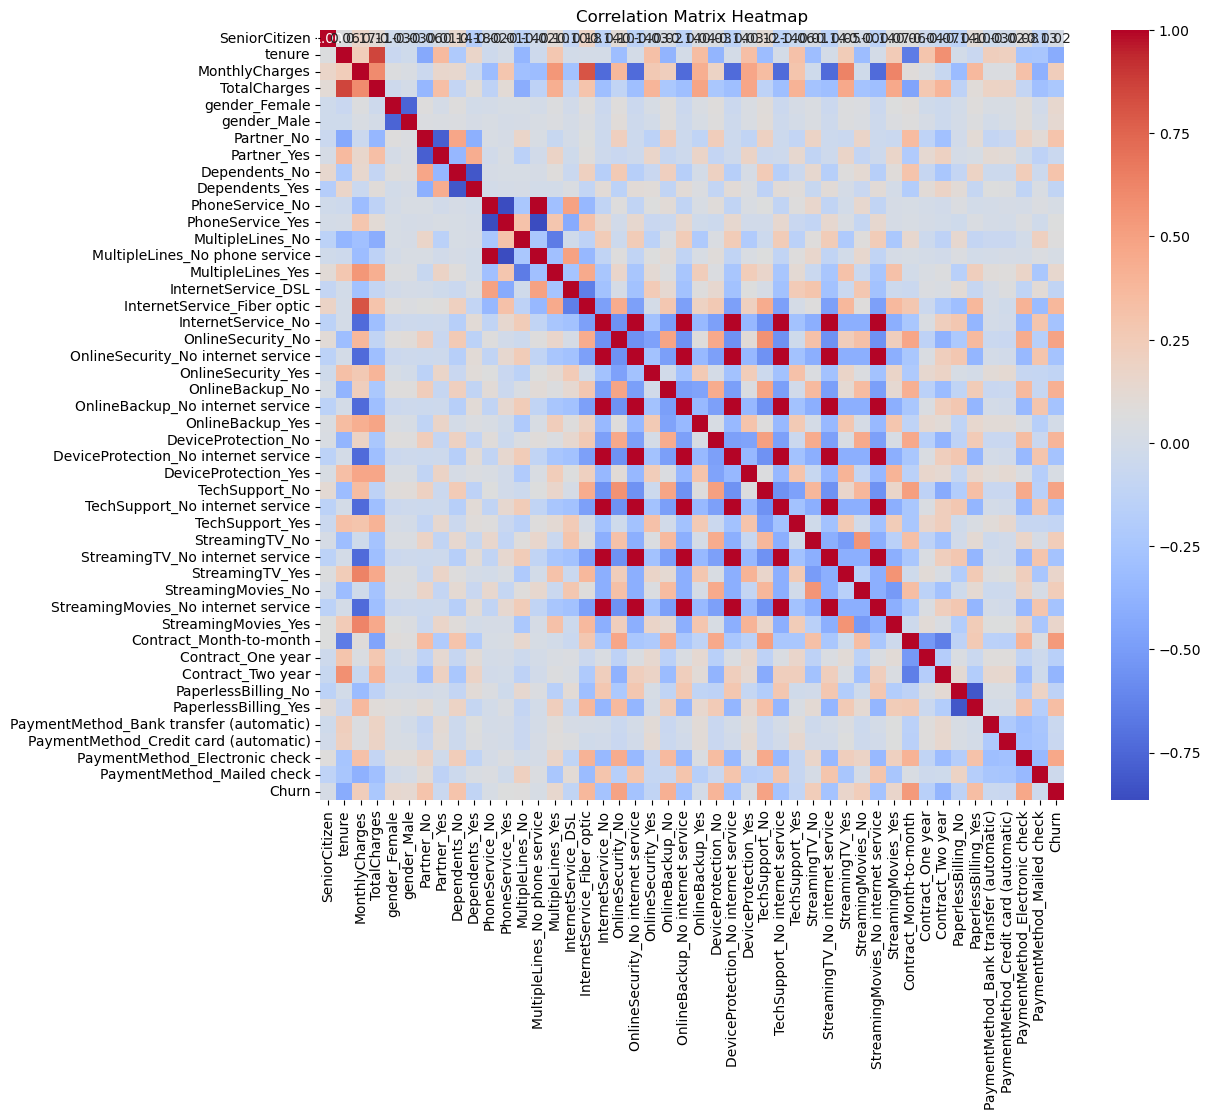

In [72]:
y_resampled_df = pd.DataFrame(y_resampled, columns=['Churn'])

# Concatenate the resampled features and target
df_merged = pd.concat([X_resampled, y_resampled_df], axis=1)


correlation_matrix = df_merged.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [247]:
##### Calculate the correlation with the target variable
target_corr = correlation_matrix['Churn'].sort_values(ascending=False)

# Define a threshold
threshold = 0.1

# Select eatures with correlation above the threshold
important_features = target_corr[abs(target_corr) > threshold].index.tolist()

print("Important features based on correlation with target:\n", len(important_features))

Important features based on correlation with target:
 35


In [248]:
important_features

['Churn',
 'Contract_Month-to-month',
 'OnlineSecurity_No',
 'TechSupport_No',
 'PaymentMethod_Electronic check',
 'OnlineBackup_No',
 'DeviceProtection_No',
 'InternetService_Fiber optic',
 'PaperlessBilling_Yes',
 'Partner_No',
 'Dependents_No',
 'StreamingTV_No',
 'StreamingMovies_No',
 'MonthlyCharges',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'gender_Female',
 'MultipleLines_Yes',
 'gender_Male',
 'TechSupport_Yes',
 'Dependents_Yes',
 'InternetService_DSL',
 'OnlineSecurity_Yes',
 'PaperlessBilling_No',
 'Contract_One year',
 'TotalCharges',
 'InternetService_No',
 'StreamingMovies_No internet service',
 'OnlineSecurity_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'Contract_Two year',
 'tenure']

# Model Training

In [249]:
from sklearn.model_selection import train_test_split

important_features = [col for col in important_features if col in X_resampled.columns]

X_selected = X_resampled[important_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (8260, 34)
Testing set shape:  (2066, 34)


In [251]:
# data frame for compairing the results
columns = ['Model name', 'accuracy', 'precision', 'recall', 'f1-score']
models_metrics = pd.DataFrame(columns=columns)

def add_metrics(name,class_report):
    model_metrics = {
        'Model name': name,
        'accuracy':class_report['accuracy'], 
        'precision': class_report['weighted avg']['precision'], 
        'recall': class_report['weighted avg']['recall'], 
        'f1-score': class_report['weighted avg']['f1-score']
    }
    
    # Convert the metrics dictionary to a DataFrame
    metrics_df = pd.DataFrame([model_metrics])
    global models_metrics
    models_metrics = pd.concat([models_metrics, metrics_df], ignore_index=True)
    print(metrics_df)


C:\Users\karth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


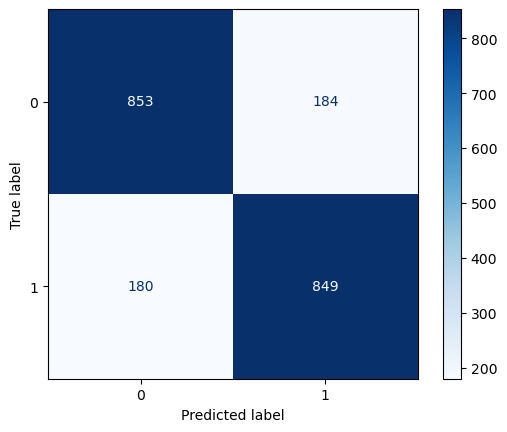

            Model name  accuracy  precision    recall  f1-score
0  Logistic Regression  0.823814   0.823822  0.823814  0.823815


C:\Users\karth\AppData\Local\Temp\ipykernel_4536\1517169830.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  models_metrics = pd.concat([models_metrics, metrics_df], ignore_index=True)


In [252]:
# Train and evaluate Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred_lr = logistic_regression.predict(X_test)

cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

class_report = classification_report(y_test, y_pred_lr, output_dict=True)

add_metrics('Logistic Regression',class_report)

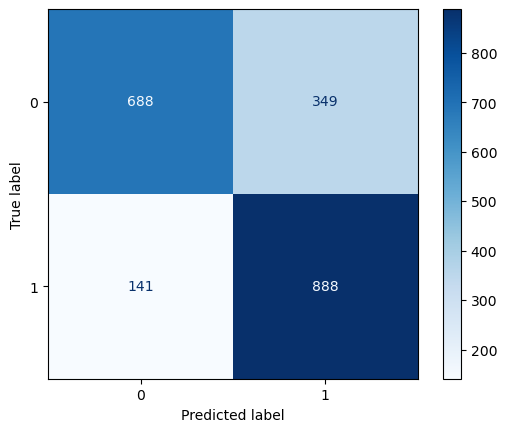

    Model name  accuracy  precision    recall  f1-score
0  naive bayes  0.762827   0.774108  0.762827  0.760493


In [253]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

class_report = classification_report(y_test, y_pred_nb,output_dict=True)

add_metrics('naive bayes',class_report)

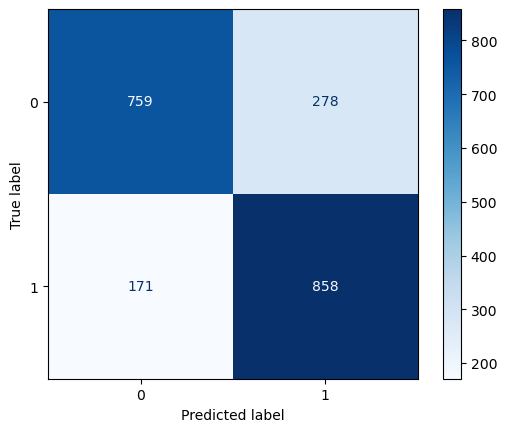

            Model name  accuracy  precision    recall  f1-score
0  k nearest neighbors  0.782672   0.785823  0.782672  0.782131


In [254]:
k_nearest_neighbors = KNeighborsClassifier()
k_nearest_neighbors.fit(X_train, y_train)
y_pred_knn = k_nearest_neighbors.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

class_report = classification_report(y_test, y_pred_knn,output_dict=True)

add_metrics('k nearest neighbors',class_report)

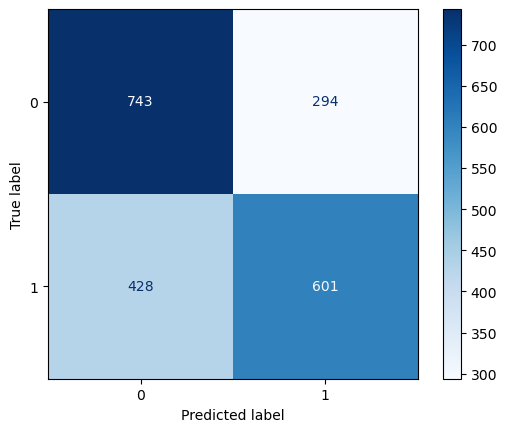

               Model name  accuracy  precision    recall  f1-score
0  support vector machine  0.650532   0.652933  0.650532  0.648967


In [255]:
support_vector_machine = SVC()
support_vector_machine.fit(X_train, y_train)
y_pred_svm=support_vector_machine.predict(X_test)
accuracy_svm=accuracy_score(y_test, y_pred_svm)

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

class_report = classification_report(y_test, y_pred_svm,output_dict=True)

add_metrics('support vector machine',class_report)

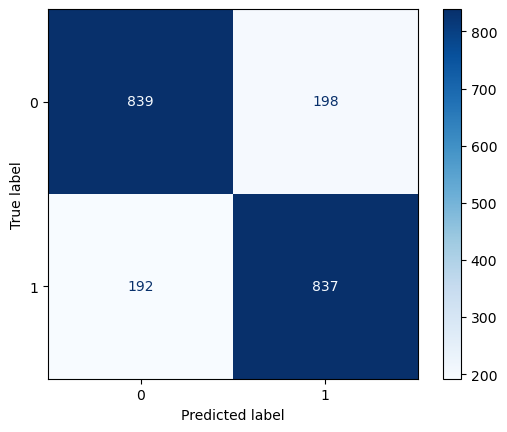

                 Model name  accuracy  precision    recall  f1-score
0  Decision Tree Classifier  0.811229   0.811244  0.811229   0.81123


In [256]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

class_report = classification_report(y_test, y_pred_dt, output_dict=True)

add_metrics('Decision Tree Classifier',class_report)

#### Results

In [257]:
models_metrics

,Model name,accuracy,precision,recall,f1-score
0,Logistic Regression,0.823814,0.823822,0.823814,0.823815
1,naive bayes,0.762827,0.774108,0.762827,0.760493
2,k nearest neighbors,0.782672,0.785823,0.782672,0.782131
3,support vector machine,0.650532,0.652933,0.650532,0.648967
4,Decision Tree Classifier,0.811229,0.811244,0.811229,0.811230


* Logistic Regression and Decision Tree Classifier have the best performance overall, showing high accuracy, precision, recall, and F1-score.
* Both models show consistency across accuracy, precision, recall, and F1-score, indicating they provide a balanced performance and are robust in their predictions.

In [258]:
Final = pd.DataFrame({
    'True values': y_test,
    'Predicted values (Logistic Regression)': y_pred_lr
})
Final

,True values,Predicted values (Logistic Regression)
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
2061,0,0
2062,1,1
2063,1,0
2064,1,1
